In [94]:
import numpy as np
import matplotlib.pyplot as plt

In [95]:
nPerCLust = 50 # 클러스터당 데이터 개수

blur = 1 # 데이터 분산 정도

A = [1, 1]
B = [-3, 1]
C = [3, 3]

# 가우시안 분포 => 평균: 0, 분산: 1
# shape = (2, 50)
a = [A[0] + np.random.randn(nPerCLust) * blur, A[1] + np.random.randn(nPerCLust) * blur]
b = [B[0] + np.random.randn(nPerCLust) * blur, B[1] + np.random.randn(nPerCLust) * blur]
c = [C[0] + np.random.randn(nPerCLust) * blur, C[1] + np.random.randn(nPerCLust) * blur]

# 그래프를 쉽게 그리기 위해 transpose
data = np.transpose(np.concatenate((a, b, c), axis=1))




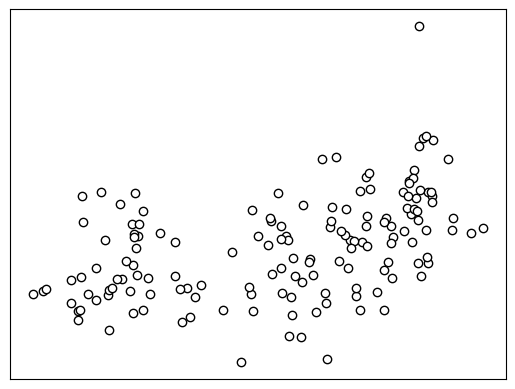

In [96]:
# 그래프 그리기
plt.plot(data[:, 0], data[:, 1], 'ko', markerfacecolor='w')
plt.xticks([])
plt.yticks([])

plt.show()

In [97]:
k = 3 # hyperparameter

ridx = np.random.choice(data.shape[0], k, replace=False) # 0~149 중에서 3개를 뽑음

centroids = data[ridx,:] # (3,2)

centroids

array([[3.01225186, 2.76565004],
       [2.35672153, 0.50770288],
       [0.2885803 , 0.48103061]])

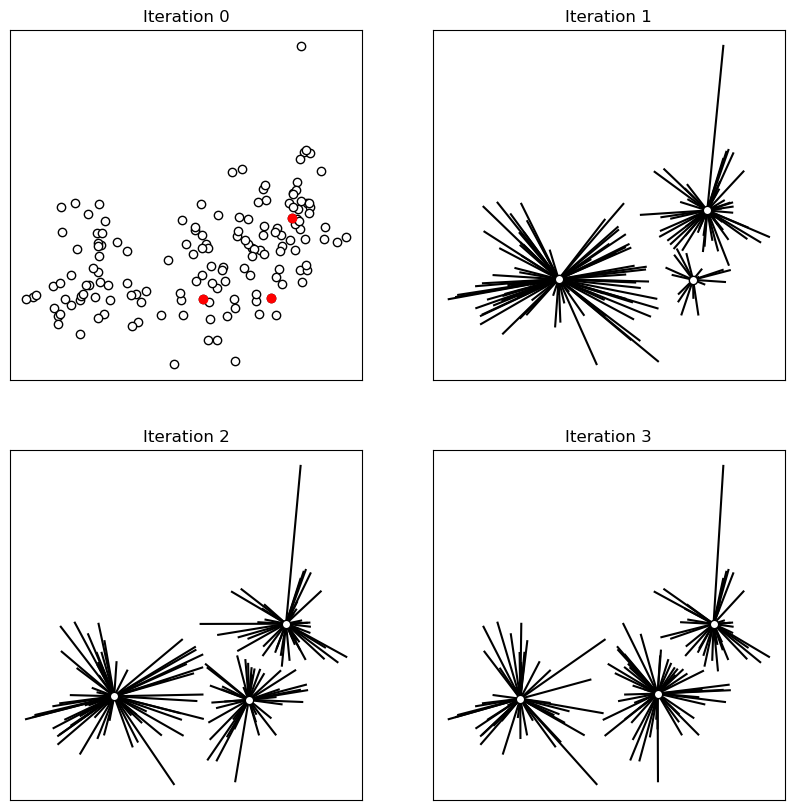

In [98]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()
axs[0].plot(data[:, 0], data[:, 1], 'ko', markerfacecolor='w')
axs[0].plot(centroids[:,0], centroids[:,1], 'ro')

for i in range(len(axs)):
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].title.set_text(f'Iteration {i}')

for iteri in range(3):
    # 1. centroids 에서 각 데이터까지의 거리를 계산
    dists = np.zeros((data.shape[0], k))
    # 유클리드 거리 계산
    for ci in range(k):
        dists[:, ci] = np.sum((data - centroids[ci, :]) ** 2, axis=1)

    # 2. 제일 작은 거리 찾기
    groupIdx = np.argmin(dists, axis=1)

    # 3. centroids 업데이트

    for ki in range(k):
        centroids[ki, :] = [
            np.mean(data[groupIdx == ki, 0]),
            np.mean(data[groupIdx == ki, 1])
        ]
    
    for i in range(data.shape[0]):
        axs[iteri + 1].plot(
            [data[i, 0], centroids[groupIdx[i], 0]],
            [data[i, 1], centroids[groupIdx[i], 1]],
            'k-'
        )
    axs[iteri + 1].plot(centroids[:,0], centroids[:,1], 'ko', markerfacecolor='w')
    


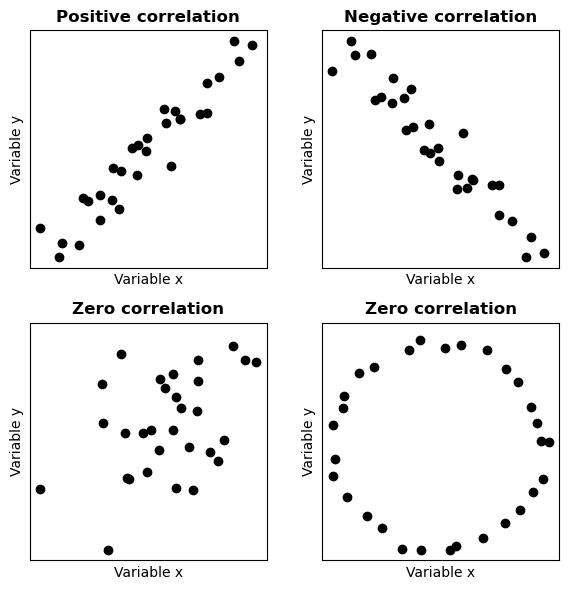

In [50]:
N = 30

# correlated random variables
x = np.linspace(0,10,N) + np.random.randn(N)
y = x + np.random.randn(N)


# set up figure
_,axs = plt.subplots(2,2,figsize=(6,6))

# positive correlation
axs[0,0].plot(x,y,'ko')
axs[0,0].set_title('Positive correlation',fontweight='bold')
axs[0,0].set_xlabel('Variable x')
axs[0,0].set_ylabel('Variable y')
axs[0,0].set_xticks([])
axs[0,0].set_yticks([])
axs[0,0].axis('square')


# negative correlation
axs[0,1].plot(x,-y,'ko')
axs[0,1].set_title('Negative correlation',fontweight='bold')
axs[0,1].set_xlabel('Variable x')
axs[0,1].set_ylabel('Variable y')
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])
axs[0,1].axis('square')


# zero correlation, part 1
axs[1,0].plot(np.random.randn(N),np.random.randn(N),'ko')
axs[1,0].set_title('Zero correlation',fontweight='bold')
axs[1,0].set_xlabel('Variable x')
axs[1,0].set_ylabel('Variable y')
axs[1,0].set_xticks([])
axs[1,0].set_yticks([])
axs[1,0].axis('square')


# zero correlation, part 2
x = np.cos(np.linspace(0,2 * np.pi,N)) + np.random.randn(N)/20
y = np.sin(np.linspace(0,2 * np.pi,N)) + np.random.randn(N)/20
axs[1,1].plot(x,y,'ko')
axs[1,1].set_title('Zero correlation',fontweight='bold')
axs[1,1].set_xlabel('Variable x')
axs[1,1].set_ylabel('Variable y')
axs[1,1].set_xticks([])
axs[1,1].set_yticks([])
axs[1,1].axis('square')


plt.tight_layout()
plt.savefig('Figure_03_01.png',dpi=300) # write out the fig to a file
plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 상관관계!
# - A, B가 있을때 둘 사이의 경향성을 보는것
# ex) 기온과 아이스크림 판매량
# -1 ~ 1 사이의 값 (0이면 상관관계 없음)
 
# vs 인과관계
# - A가 변하면 B도 변한다
# ex) 비가 오면 우산을 들고 나간다


In [46]:
# 코사인 유사도

a = np.random.randn(15)
b = np.random.randn(15)

num = np.dot(a,b)
den = np.linalg.norm(a) * np.linalg.norm(b)

num / den

0.1582727211014214

In [47]:
# 피어슨 상관계수

np.corrcoef(a, b)

array([[1.        , 0.21454646],
       [0.21454646, 1.        ]])

In [54]:
# 두 벡터를 입력 받아서 
# 코사인 유사도와 피어슨 상관계수를 출력하는 함수

def ccNcos(v1, v2):
    cos = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
    num = np.dot(v1 - v1.mean(), v2 - v2.mean())
    den = np.linalg.norm(v1 - v1.mean()) * np.linalg.norm(v2 - v2.mean())
    cc = num / den

    return cos, cc


vec1 = np.array([1,2])
vec2 = np.array([2,3])

ccNcos(vec1, vec2)

(0.9922778767136677, 0.9999999999999998)

/var/folders/ch/ys765g1d7bj24gvgmhpgwcfc0000gn/T/ipykernel_3994/2971458825.py:8: RuntimeWarning: invalid value encountered in double_scalars
  cc = num / den
/var/folders/ch/ys765g1d7bj24gvgmhpgwcfc0000gn/T/ipykernel_3994/2971458825.py:5: RuntimeWarning: invalid value encountered in double_scalars
  cos = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))


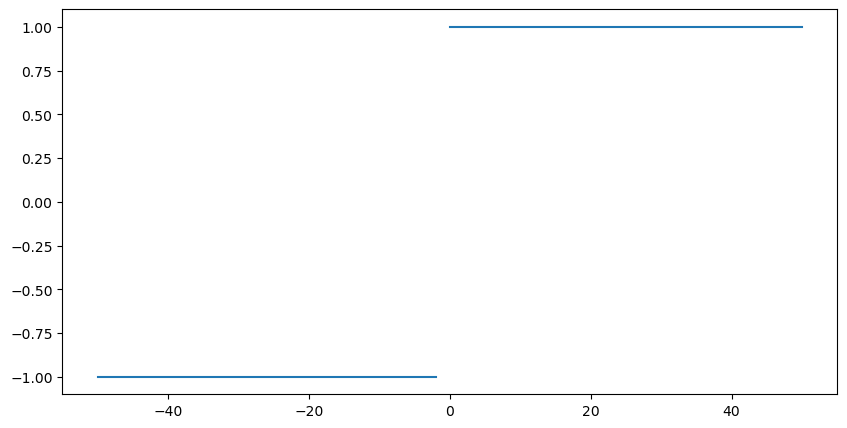

In [59]:
offsets = np.arange(-50, 51)
var = np.arange(4, dtype=float)

results = np.zeros((len(offsets), 2))

for i in range(len(offsets)):
    

plt.figure(figsize=(10, 5))
plt.plot(offsets, results)

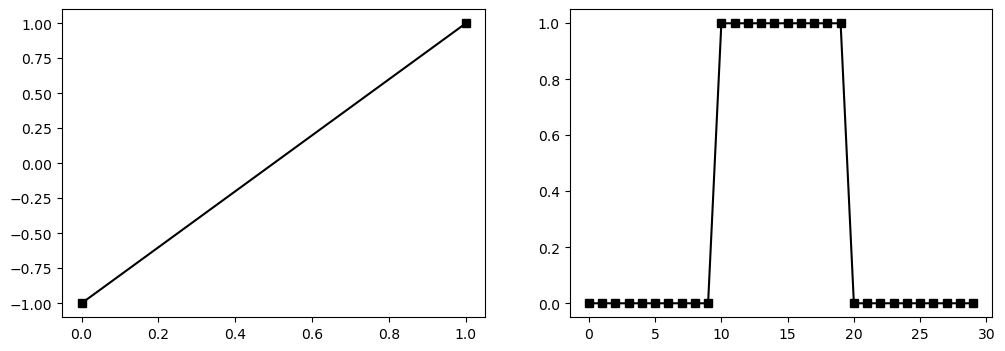

In [63]:
kernel = np.array([-1 , 1])
signal = np.zeros(30)

signal[10:20] = 1

_, axs = plt.subplots(1,2 , figsize=(12, 4))
axs[0].plot(kernel, "ks-")
axs[1].plot(signal, "ks-")

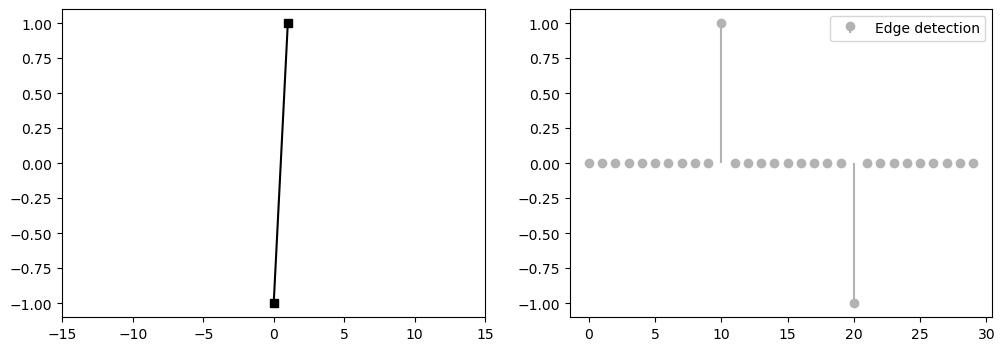

In [66]:
featureMap = np.zeros(len(signal))

for t in range(1, len(signal) -1):
    featureMap[t] = np.dot(kernel, signal[t-1:t+1])

_, axs = plt.subplots(1,2 , figsize=(12, 4))
axs[0].plot(kernel, "ks-")
axs[0].set_xlim([-15, 15])

markers,stemlines,_ = axs[1].stem(range(len(featureMap)),featureMap,
                                  basefmt=' ',linefmt='',markerfmt='o',
                                  label='Edge detection')
plt.setp(stemlines, 'color', [.7, .7, .7])
plt.setp(markers, 'color', [.7, .7, .7])

axs[1].legend()

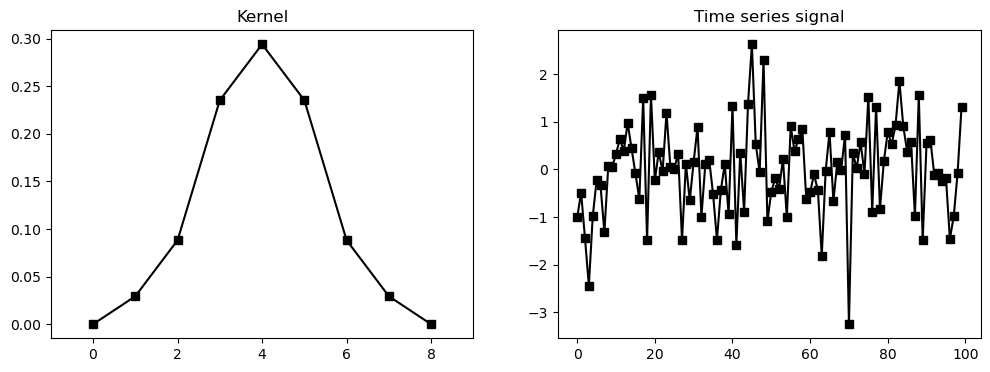

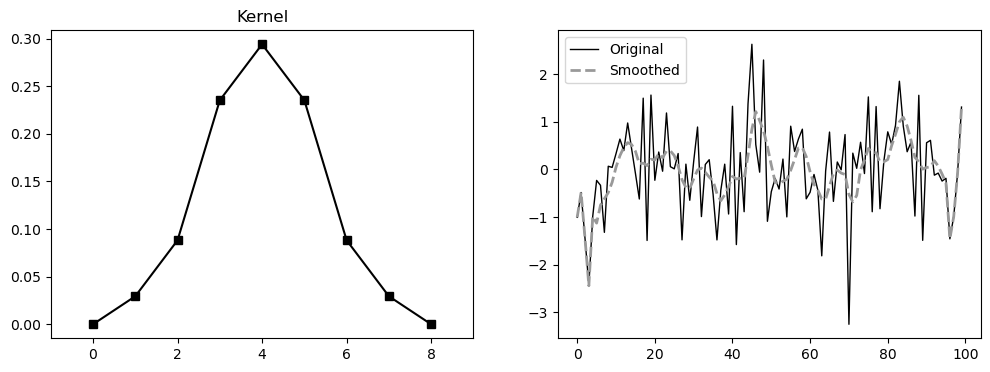

In [67]:
# Exercise 6
kernel = np.array([0,.1,.3,.8,1,.8,.3,.1,0])
kernel = kernel / np.sum(kernel)

# some handy length parameters
Nkernel = len(kernel)
halfKrn = Nkernel//2


# and the signal
Nsignal = 100
timeseries = np.random.randn(Nsignal)


# plot them
_ ,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-1,len(kernel)])

axs[1].plot(timeseries,'ks-')
axs[1].set_title('Time series signal')

plt.savefig('Figure_03_06ab.png',dpi=300)
plt.show()

# make a copy of the signal for filtering
filtsig = timeseries.copy()

# loop over the signal time points
for t in range(halfKrn+1,Nsignal-halfKrn):
  filtsig[t] = np.dot(kernel,timeseries[t-halfKrn-1:t+halfKrn])


# and plot
_ ,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-1,len(kernel)])

axs[1].plot(timeseries,color='k',label='Original',linewidth=1)
axs[1].plot(filtsig,'--',color=[.6,.6,.6],label='Smoothed',linewidth=2)
axs[1].legend()

plt.savefig('Figure_03_06c.png',dpi=300)
plt.show()

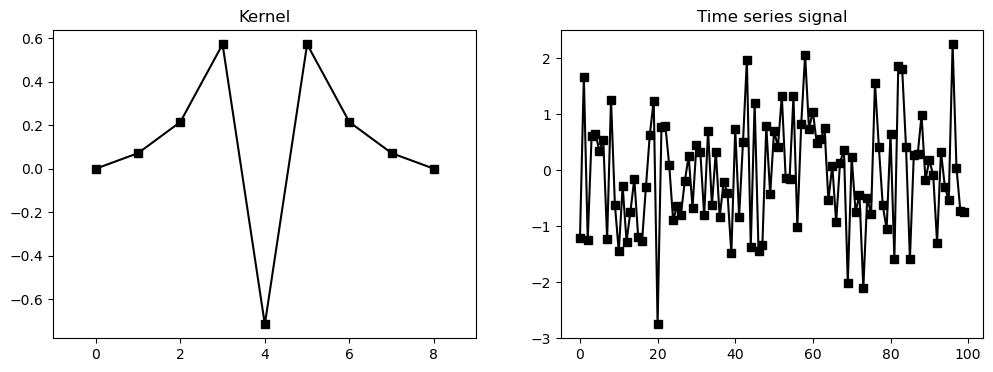

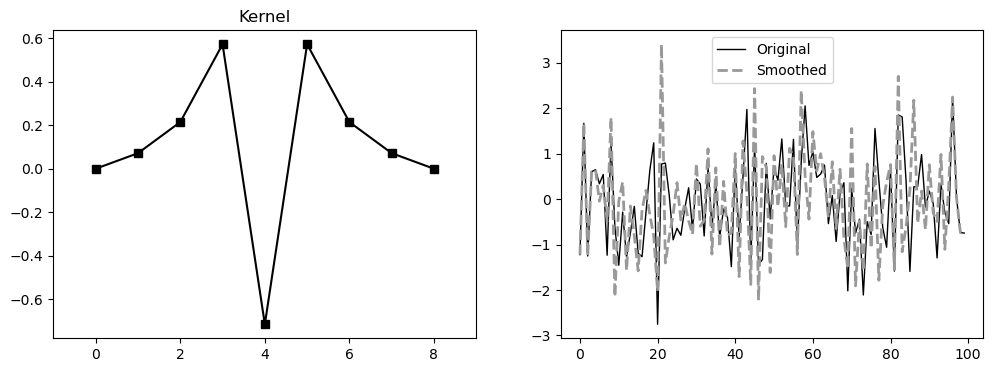

In [68]:
# Exercise 6
kernel = np.array([0,.1,.3,.8,-1,.8,.3,.1,0])
kernel = kernel / np.sum(kernel)

# some handy length parameters
Nkernel = len(kernel)
halfKrn = Nkernel//2


# and the signal
Nsignal = 100
timeseries = np.random.randn(Nsignal)


# plot them
_ ,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-1,len(kernel)])

axs[1].plot(timeseries,'ks-')
axs[1].set_title('Time series signal')

plt.savefig('Figure_03_06ab.png',dpi=300)
plt.show()

# make a copy of the signal for filtering
filtsig = timeseries.copy()

# loop over the signal time points
for t in range(halfKrn+1,Nsignal-halfKrn):
  filtsig[t] = np.dot(kernel,timeseries[t-halfKrn-1:t+halfKrn])


# and plot
_ ,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-1,len(kernel)])

axs[1].plot(timeseries,color='k',label='Original',linewidth=1)
axs[1].plot(filtsig,'--',color=[.6,.6,.6],label='Smoothed',linewidth=2)
axs[1].legend()

plt.savefig('Figure_03_06c.png',dpi=300)
plt.show()

### image sharpening